# 1 Author

**Student Name**: Chan King Ning

**Student ID**: 230509074

# 2 Problem formulation

For the advanced part, I want to solve the image classification for 'vegetarian' and 'non-vegetarian' food. Since meat is a symbol of non-vegetarian and vegetables is a symbol of vegetarian. By using their special features, I could be able to make classification by using different machine learning models.

# 3 Machine Learning pipeline

1. Input: The input will be food images for 'vegetarian' and 'non-vegetarian'.
2. Preprocessing: Resize the image into standard size and normalize the pixel values.
3. Feature Extraction: Extract features from the images that will be used to train the model. Features include colour and texture.
4. Model Training: Train machine learning models on the training set such as Linear Classifier, Support Vector Machines (SVM) and Random Forest Classifier.
5. Model Evaluation: Use accuracy and confusion matrix to evaluate the model's performance.
6. Output: The output of the pipeline is the predicted class ('vegetarian' or 'non-vegetarian') for each image.

# 4 Transformation stage

In the transformation stage, I have extracted the red and green components of the images and texture features using GLCM as feature extraction. The reason to choose red and green component is that meat mainly has large amount of red colour while vegetables mainly has large amount of green colour. Texture feature is chosen as a feature for image classification because it captures patterns or variations in the intensity of surfaces, which can differentiate objects within an image.

# 5 Modelling
I have used 3 machine learning models for the project.

1. Linear Support Vector Classifier (LinearSVC): This model is a type of Support Vector Machine (SVM) with a linear kernel. It’s chosen because it’s effective in high dimensional spaces and best suited for binary classification problems. The parameter C=10 controls the penalty for misclassification, with a higher value leading to less tolerance for misclassification.
2. Random Forest Classifier: This model is an ensemble learning method that operates by constructing multiple decision trees during training and outputting the class that is the mode of the classes of the individual trees. It’s chosen because it’s robust to overfitting, can handle large datasets with high dimensionality, and provides importance scores for features. The parameters n_estimators=5 and max_depth=3 control the number of trees in the forest and the maximum depth of the trees, respectively.
3. Support Vector Classifier (SVC) with Radial Basis Function (RBF) Kernel: This model is another type of SVM, but with a non-linear RBF kernel. It’s chosen because it can handle non-linear decision boundaries. The class_weight='balanced' parameter helps to adjust weights inversely proportional to class frequencies in the input data, which is useful for imbalanced datasets.

# 6 Methodology
I trained these 3 models using the training dataset X_train_fn and Y_train. X_train_fn is the feature matrix from training set by extacting different features from each image. Y_train is the target vector for the training set. It contains the labels for each image in your training set.

I used accuracy and confusion matrix to evaluate the performance of the models.

- Accuracy: I calculated the training and test accuracy by comparing the predicted labels with the actual labels. Accuracy is the proportion of correct predictions over total predictions.
- Confusion Matrix: I created a confusion matrix for each model to visualize the performance of the classification model.

# 7 Dataset

In [ ]:
!pip install mlend

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 28.3 MB/s eta 0:00:00


In [ ]:
from google.colab import drive

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import spkit as sp

from skimage import exposure
from skimage.color import rgb2hsv, rgb2gray
import skimage as ski

import mlend
from mlend import download_yummy_small, yummy_small_load

import os, sys, re, pickle, glob
import urllib.request
import zipfile

import IPython.display as ipd
from tqdm import tqdm
import librosa

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import mlend
from mlend import download_yummy, yummy_load

subset = {}

datadir = download_yummy(save_to = '/content/drive/MyDrive/Data_miniproject/MLEnd', subset = subset,verbose=1,overwrite=False)

100%|▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓|3250\3250|003250.jpg
Done!


In [ ]:
os.listdir(datadir)

['MLEndYD_images', 'MLEndYD_image_attributes_benchmark.csv']

In [ ]:
MLENDYD_df = pd.read_csv('/content/drive/MyDrive/Data_miniproject/MLEnd/yummy/MLEndYD_image_attributes_benchmark.csv').set_index('filename')
MLENDYD_df

,Diet,Cuisine_org,Cuisine,Dish_name,Home_or_restaurant,Ingredients,Healthiness_rating,Healthiness_rating_int,Likeness,Likeness_int,Benchmark_A
filename,,,,,,,,,,,
000001.jpg,non_vegetarian,japanese,japanese,chicken_katsu_rice,marugame_udon,"rice,chicken_breast,spicy_curry_sauce",neutral,3.0,like,4.0,Train
000002.jpg,non_vegetarian,english,english,english_breakfast,home,"eggs,bacon,hash_brown,tomato,bread,tomato,bake...",unhealthy,2.0,like,4.0,Train
000003.jpg,non_vegetarian,chinese,chinese,spicy_chicken,jinli_flagship_branch,"chili,chicken,peanuts,sihuan_peppercorns,green...",neutral,3.0,strongly_like,5.0,Train
000004.jpg,vegetarian,indian,indian,gulab_jamun,home,"sugar,water,khoya,milk,salt,oil,cardamon,ghee",unhealthy,2.0,strongly_like,5.0,Train
000005.jpg,non_vegetarian,indian,indian,chicken_masala,home,"chicken,lemon,turmeric,garam_masala,coriander_...",healthy,4.0,strongly_like,5.0,Train
...,...,...,...,...,...,...,...,...,...,...,...
003246.jpg,vegetarian,indian,indian,zeera_rice,home,"1_cup_basmati_rice,2_cups_water,2_tablespoons_...",healthy,4.0,strongly_like,5.0,Train
003247.jpg,vegetarian,indian,indian,paneer_and_dal,home,"fried_cottage_cheese,ghee,lentils,milk,wheat_f...",healthy,4.0,strongly_like,5.0,Test
003248.jpg,vegetarian,indian,indian,samosa,home,"potato,onion,peanut,salt,turmeric_powder,red_c...",very_unhealthy,1.0,like,4.0,Test


In [ ]:
sample_path = '/content/drive/MyDrive/Data_miniproject/MLEnd/yummy/MLEndYD_images/*.jpg'
files = glob.glob(sample_path)
len(files)

3250

First, we will modify the dataframe so that 'Diet' only include 'vegetarian' and 'non_vegetarian'

In [ ]:
MLENDYD_df = MLENDYD_df[MLENDYD_df['Diet'].isin(['vegetarian', 'non_vegetarian'])]
MLENDYD_df

,Diet,Cuisine_org,Cuisine,Dish_name,Home_or_restaurant,Ingredients,Healthiness_rating,Healthiness_rating_int,Likeness,Likeness_int,Benchmark_A
filename,,,,,,,,,,,
000001.jpg,non_vegetarian,japanese,japanese,chicken_katsu_rice,marugame_udon,"rice,chicken_breast,spicy_curry_sauce",neutral,3.0,like,4.0,Train
000002.jpg,non_vegetarian,english,english,english_breakfast,home,"eggs,bacon,hash_brown,tomato,bread,tomato,bake...",unhealthy,2.0,like,4.0,Train
000003.jpg,non_vegetarian,chinese,chinese,spicy_chicken,jinli_flagship_branch,"chili,chicken,peanuts,sihuan_peppercorns,green...",neutral,3.0,strongly_like,5.0,Train
000004.jpg,vegetarian,indian,indian,gulab_jamun,home,"sugar,water,khoya,milk,salt,oil,cardamon,ghee",unhealthy,2.0,strongly_like,5.0,Train
000005.jpg,non_vegetarian,indian,indian,chicken_masala,home,"chicken,lemon,turmeric,garam_masala,coriander_...",healthy,4.0,strongly_like,5.0,Train
...,...,...,...,...,...,...,...,...,...,...,...
003245.jpg,non_vegetarian,italian,italian,spaghetti_bolognese,home,"olive_oil,beef_mince,onion,carrot,celery,garli...",neutral,3.0,strongly_like,5.0,Train
003246.jpg,vegetarian,indian,indian,zeera_rice,home,"1_cup_basmati_rice,2_cups_water,2_tablespoons_...",healthy,4.0,strongly_like,5.0,Train
003247.jpg,vegetarian,indian,indian,paneer_and_dal,home,"fried_cottage_cheese,ghee,lentils,milk,wheat_f...",healthy,4.0,strongly_like,5.0,Test


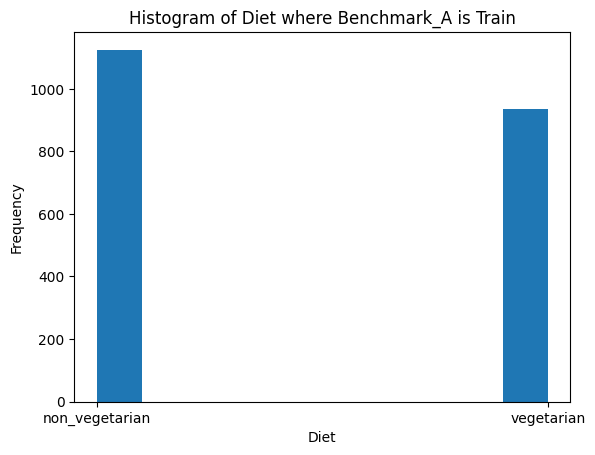

In [ ]:
plt.hist(MLENDYD_df[MLENDYD_df['Benchmark_A'] == 'Train']['Diet'])

plt.title('Histogram of Diet where Benchmark_A is Train')
plt.xlabel('Diet')
plt.ylabel('Frequency')

plt.show()

From the histogram, we could see that in the training set, the frequency of 'non-vegetarian' and 'vegetarian' is slightly imbalanced. To play safe, I will set class_weight='balanced' for model training in later section to avoid poor performance on minority class (vegetarian).

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

encoded_labels = le.fit_transform(MLENDYD_df['Diet'])

MLENDYD_df['diet_encoded'] = encoded_labels

<ipython-input-9-ee260b485cc2>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
MLENDYD_df

,Diet,Cuisine_org,Cuisine,Dish_name,Home_or_restaurant,Ingredients,Healthiness_rating,Healthiness_rating_int,Likeness,Likeness_int,Benchmark_A,diet_encoded
filename,,,,,,,,,,,,
000001.jpg,non_vegetarian,japanese,japanese,chicken_katsu_rice,marugame_udon,"rice,chicken_breast,spicy_curry_sauce",neutral,3.0,like,4.0,Train,0
000002.jpg,non_vegetarian,english,english,english_breakfast,home,"eggs,bacon,hash_brown,tomato,bread,tomato,bake...",unhealthy,2.0,like,4.0,Train,0
000003.jpg,non_vegetarian,chinese,chinese,spicy_chicken,jinli_flagship_branch,"chili,chicken,peanuts,sihuan_peppercorns,green...",neutral,3.0,strongly_like,5.0,Train,0
000004.jpg,vegetarian,indian,indian,gulab_jamun,home,"sugar,water,khoya,milk,salt,oil,cardamon,ghee",unhealthy,2.0,strongly_like,5.0,Train,1
000005.jpg,non_vegetarian,indian,indian,chicken_masala,home,"chicken,lemon,turmeric,garam_masala,coriander_...",healthy,4.0,strongly_like,5.0,Train,0
...,...,...,...,...,...,...,...,...,...,...,...,...
003245.jpg,non_vegetarian,italian,italian,spaghetti_bolognese,home,"olive_oil,beef_mince,onion,carrot,celery,garli...",neutral,3.0,strongly_like,5.0,Train,0
003246.jpg,vegetarian,indian,indian,zeera_rice,home,"1_cup_basmati_rice,2_cups_water,2_tablespoons_...",healthy,4.0,strongly_like,5.0,Train,1
003247.jpg,vegetarian,indian,indian,paneer_and_dal,home,"fried_cottage_cheese,ghee,lentils,milk,wheat_f...",healthy,4.0,strongly_like,5.0,Test,1


For 'non-vegetarian', it is class 0. For 'vegetarian', it is class 1.

Based on the Benchmark_A, I will separate the dataset into TrainSet and TestSet.

Now, I will create TrainSet and TestSet and both consists of X_paths, Y and Y_encoded and the mapping for 'rice' and 'chips'.

In [ ]:
TrainSet = {}
TestSet = {}

TrainSet['Y'] = MLENDYD_df.loc[MLENDYD_df['Benchmark_A'] == 'Train', 'diet_encoded'].values
TestSet['Y'] = MLENDYD_df.loc[MLENDYD_df['Benchmark_A'] == 'Test', 'diet_encoded'].values

In [ ]:
print(TrainSet['Y'].shape)
print(TestSet['Y'].shape)

(2059,)
(881,)


In [ ]:
TrainSet['Y_encoded'] = MLENDYD_df.loc[MLENDYD_df['Benchmark_A'] == 'Train', 'diet_encoded'].values
TestSet['Y_encoded'] = MLENDYD_df.loc[MLENDYD_df['Benchmark_A'] == 'Test', 'diet_encoded'].values

In [ ]:
print(TrainSet['Y_encoded'].shape)
print(TestSet['Y_encoded'].shape)

(2059,)
(881,)


In [ ]:
MAPs = {'Diet': dict(zip(le.classes_, le.transform(le.classes_)))}

In [ ]:
MAPs

{'Diet': {'non_vegetarian': 0, 'vegetarian': 1}}

In [ ]:
train_filenames = MLENDYD_df.loc[MLENDYD_df['Benchmark_A'] == 'Train'].index.tolist()
test_filenames = MLENDYD_df.loc[MLENDYD_df['Benchmark_A'] == 'Test'].index.tolist()

In [ ]:
image_dr = '/content/drive/MyDrive/Data_miniproject/MLEnd/yummy/MLEndYD_images/'
image_paths = [os.path.join(image_dr, filename) for filename in MLENDYD_df.index]

In [ ]:
len(image_paths)

2940

In [ ]:
TrainSet['X_paths'] = [path for path in image_paths if os.path.basename(path) in train_filenames]
TestSet['X_paths'] = [path for path in image_paths if os.path.basename(path) in test_filenames]

In [ ]:
print(len(TrainSet['X_paths']))
print(len(TestSet['X_paths']))

2059
881


In [ ]:
X_train_paths = TrainSet['X_paths']
X_test_paths  = TestSet['X_paths']

Y_train = TrainSet['Y_encoded']
Y_test  = TestSet['Y_encoded']

Next, we will resize the images.

In [ ]:
def make_it_square(I, pad=0):
  N,M,C = I.shape
  if N>M:
    Is = [np.pad(I[:,:,i], [(0,0),(0, N-M)], 'constant', constant_values=pad) for i in range(C)]
  else:
    Is = [np.pad(I[:,:,i], [(0, M-N),(0,0)], 'constant', constant_values=pad) for i in range(C)]

  return np.array(Is).transpose([1,2,0])

def resize_img(I,size=[100,100]):
  N,M,C = I.shape
  Ir = [sp.core.processing.resize(I[:,:,i],size) for i in range(C)]
  return np.array(Ir).transpose([1,2,0])

In [ ]:
X_train = []
for k,file in enumerate(X_train_paths):
  sp.utils.ProgBar_JL(k,len(X_train_paths),L=50,color='blue')
  I = plt.imread(file)
  I = make_it_square(I, pad=0)
  I = resize_img(I,size=[200,200])
  X_train.append(I)


X_test = []
for k,file in enumerate(X_test_paths):
  sp.utils.ProgBar_JL(k,len(X_test_paths),L=50,color='blue')
  I = plt.imread(file)
  I = make_it_square(I, pad=0)
  I = resize_img(I,size=[200,200])
  X_test.append(I)

X_train = np.array(X_train)
X_test = np.array(X_test)
X_train.shape, X_test.shape

100%|▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓|2059\2059|
Done!
100%|▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓|881\881|
Done!


((2059, 200, 200, 3), (881, 200, 200, 3))

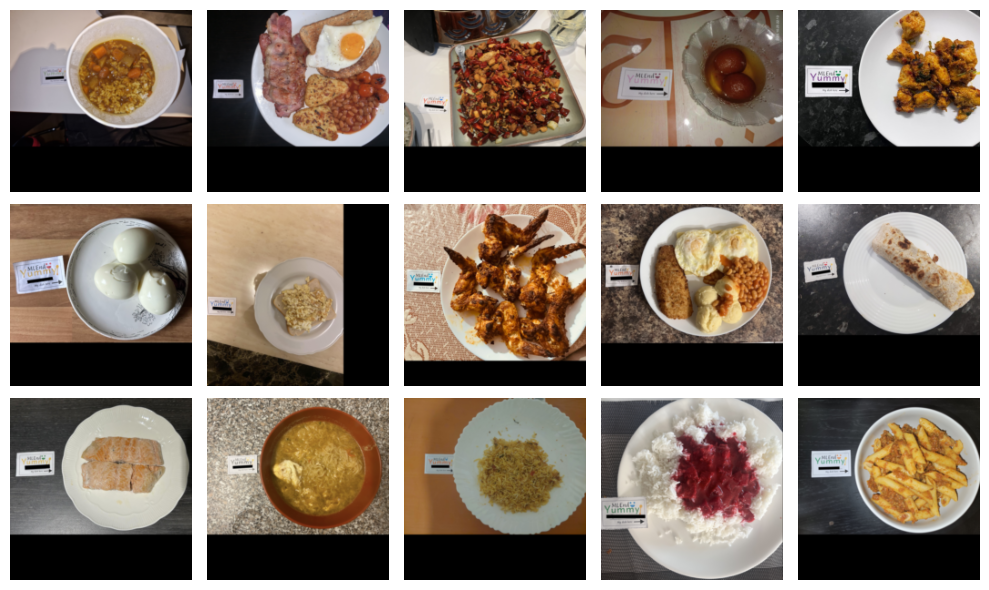

In [ ]:
plt.figure(figsize=(10,6))
for k,I in enumerate(X_train):
  plt.subplot(3,5,k+1)
  plt.imshow(I)
  plt.axis('off')
  k+=1
  if k>=15:break
plt.tight_layout()
plt.show()

For the advanced part of the project, I want to do 3 experiments to determine 3 conditions.
- Condition 1: Only colour component of the images as input
- Condition 2: Only texture features of the images as input
- Condition 3: Colour component and texture features of the images as input

Then we will perform machine learning models and evaluate their performance. Finally, we could conclude whether colour matters or texture matters or both matters.

# Condition 1: Only colour component

In [ ]:
from skimage.feature import ORB
from skimage.feature import graycomatrix, graycoprops


def get_green_component(I, t1=35, t2=85):
  Ihsv = (rgb2hsv(I)*255).astype('uint8')
  mask = (Ihsv[:,:,0] > t1) & (Ihsv[:,:,0] < t2)
  green_pixels = mask.sum()
  return green_pixels

def get_red_component(I, t1=0, t2=30):
  Ihsv = (rgb2hsv(I)*255).astype('uint8')
  mask = (Ihsv[:,:,0] > t1) & (Ihsv[:,:,0] < t2)
  red_pixels = mask.sum()
  return red_pixels

def showConfMat(CM, labels = ['non-vegetarian','vegetarian']):
  plt.matshow(CM,cmap='Blues')
  for i in range(CM.shape[0]):
    for j in range(CM.shape[1]):
      plt.text(i,j,CM[i,j].round(2),ha='center',)
  plt.xticks([0,1],labels)
  plt.yticks([0,1],labels)
  plt.show()

In [ ]:
X_train_f = []
for k, I in enumerate(X_train):
  f1 = get_green_component(I)
  f2 = get_red_component(I)
  X_train_f.append([f1,f2])

X_test_f = []
for k, I in enumerate(X_test):
  f1 = get_green_component(I)
  f2 = get_red_component(I)
  X_test_f.append([f1,f2])

In [ ]:
X_train_f = np.array(X_train_f)
X_test_f = np.array(X_test_f)
X_train_f.shape, X_test_f.shape

((2059, 2), (881, 2))

In [ ]:
MEAN = X_train_f.mean(0)
SD = X_train_f.std(0)

X_train_fn = (X_train_f - MEAN)/SD
X_test_fn = (X_test_f - MEAN)/SD

# 8 Results

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

model = LinearSVC(C=1)
model.fit(X_train_fn, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.


LinearSVC(C=1)

In [ ]:
ytp = model.predict(X_train_fn)
ysp = model.predict(X_test_fn)

train_accuracy = np.mean(ytp==Y_train)
test_accuracy  = np.mean(ysp==Y_test)

print('Training Accuracy:\t',train_accuracy)
print('Test  Accuracy:\t',test_accuracy)

Training Accuracy:	 0.5706653715395823
Test  Accuracy:	 0.5720771850170261


The training accuracy is 57% and the test accuracy is 57%.

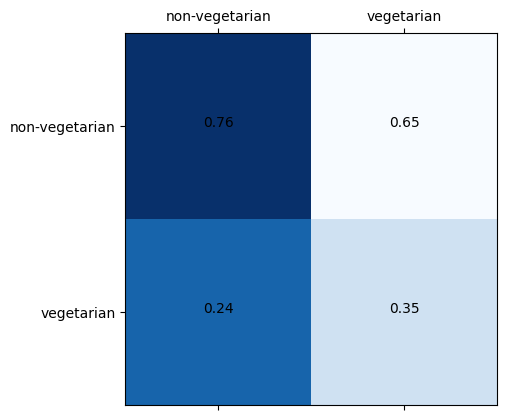

In [ ]:
Ac = np.mean(ysp[Y_test.astype(int)==0]==0)
Ar = np.mean(ysp[Y_test.astype(int)==1]==1)

Mc = np.mean(ysp[Y_test.astype(int)==0]==1)
Mr = np.mean(ysp[Y_test.astype(int)==1]==0)

CM = np.array([[Ac, Mc],[Mr, Ar]])

showConfMat(CM)

Based on the confusion matrix, we could see that the model correctly predicted 76% of ‘non-vegetarian’ images and the model correctly predicted 35% of ‘vegetarian’ images.

In [ ]:
model = RandomForestClassifier(n_estimators=5,max_depth=3,class_weight='balanced')
model.fit(X_train_fn, Y_train)

RandomForestClassifier(class_weight='balanced', max_depth=3, n_estimators=5)

In [ ]:
ytp = model.predict(X_train_fn)
ysp = model.predict(X_test_fn)

train_accuracy = np.mean(ytp==Y_train)
test_accuracy  = np.mean(ysp==Y_test)

print('Training Accuracy:\t',train_accuracy)
print('Test  Accuracy:\t',test_accuracy)

Training Accuracy:	 0.5740650801359883
Test  Accuracy:	 0.5107832009080591


The training accuracy is approximately 57% and the test accuracy is around 51%.

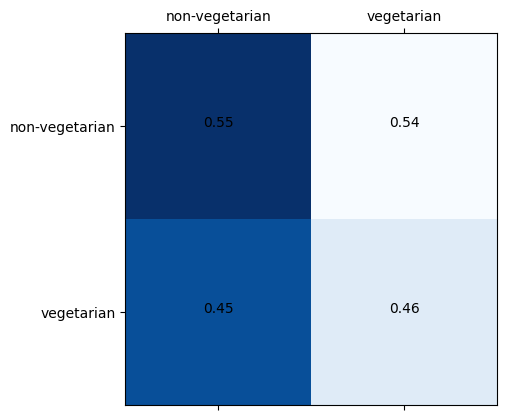

In [ ]:
Ac = np.mean(ysp[Y_test.astype(int)==0]==0)
Ar = np.mean(ysp[Y_test.astype(int)==1]==1)

Mc = np.mean(ysp[Y_test.astype(int)==0]==1)
Mr = np.mean(ysp[Y_test.astype(int)==1]==0)

CM = np.array([[Ac, Mc],[Mr, Ar]])

showConfMat(CM)

From the confusion matrix, we could see that the model correctly predicted 55% of ‘non-vegetarian’ images and the model correctly predicted 46% of ‘vegetarian’ images.

In [ ]:
from sklearn import svm

model = svm.SVC(kernel='rbf', class_weight='balanced')

model.fit(X_train_fn, Y_train)

ytp = model.predict(X_train_fn)
ysp = model.predict(X_test_fn)

In [ ]:
ytp = model.predict(X_train_fn)
ysp = model.predict(X_test_fn)

train_accuracy = np.mean(ytp==Y_train)
test_accuracy  = np.mean(ysp==Y_test)

print('Training Accuracy:\t',train_accuracy)
print('Test  Accuracy:\t',test_accuracy)

Training Accuracy:	 0.5750364254492472
Test  Accuracy:	 0.5221339387060159


The training accuracy is around 58% and the test accuracy is at 52%.

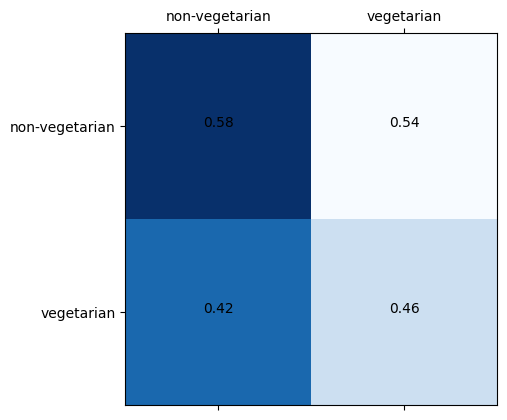

In [ ]:
Ac = np.mean(ysp[Y_test.astype(int)==0]==0)
Ar = np.mean(ysp[Y_test.astype(int)==1]==1)

Mc = np.mean(ysp[Y_test.astype(int)==0]==1)
Mr = np.mean(ysp[Y_test.astype(int)==1]==0)

CM = np.array([[Ac, Mc],[Mr, Ar]])

showConfMat(CM)

Based on the confusion matrix, we could see that the model correctly predicted 58% of ‘non-vegetarian’ images and the model correctly predicted 46% of ‘vegetarian’ images.

# Condition 2: Only texture features as input

In [ ]:
from skimage.feature import ORB
from skimage.feature import graycomatrix, graycoprops

def get_texture_features(I):

  Ig = (rgb2gray(I)*255).astype('uint8')
  glcm = graycomatrix(Ig, distances=[5], angles=[0], levels=256, symmetric=True, normed=True)

  contrast = graycoprops(glcm, 'contrast')[0, 0]
  dissimilarity = graycoprops(glcm, 'dissimilarity')[0, 0]
  energy = graycoprops(glcm, 'energy')[0, 0]
  correlation = graycoprops(glcm, 'correlation')[0, 0]

  return contrast,dissimilarity,energy,correlation


def showConfMat(CM, labels = ['non-vegetarian','vegetarian']):
  plt.matshow(CM,cmap='Blues')
  for i in range(CM.shape[0]):
    for j in range(CM.shape[1]):
      plt.text(i,j,CM[i,j].round(2),ha='center',)
  plt.xticks([0,1],labels)
  plt.yticks([0,1],labels)
  plt.show()

In [ ]:
X_train_f = []
for k, I in enumerate(X_train):
  f1,f2,f3,f4 = get_texture_features(I)
  X_train_f.append([f1,f2,f3,f4])

X_test_f = []
for k, I in enumerate(X_test):
  f1,f2,f3,f4 = get_texture_features(I)
  X_test_f.append([f1,f2,f3,f4])

In [ ]:
X_train_f = np.array(X_train_f)
X_test_f = np.array(X_test_f)
X_train_f.shape, X_test_f.shape

((2059, 4), (881, 4))

In [ ]:
MEAN = X_train_f.mean(0)
SD = X_train_f.std(0)

X_train_fn = (X_train_f - MEAN)/SD
X_test_fn = (X_test_f - MEAN)/SD

# 8 Results

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

model = LinearSVC(C=1)
model.fit(X_train_fn, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.


LinearSVC(C=1)

In [ ]:
ytp = model.predict(X_train_fn)
ysp = model.predict(X_test_fn)

train_accuracy = np.mean(ytp==Y_train)
test_accuracy  = np.mean(ysp==Y_test)

print('Training Accuracy:\t',train_accuracy)
print('Test  Accuracy:\t',test_accuracy)

Training Accuracy:	 0.5930063137445362
Test  Accuracy:	 0.5788876276958003


The training accuracy is around 59% and the test accuracy is approximately 58%.

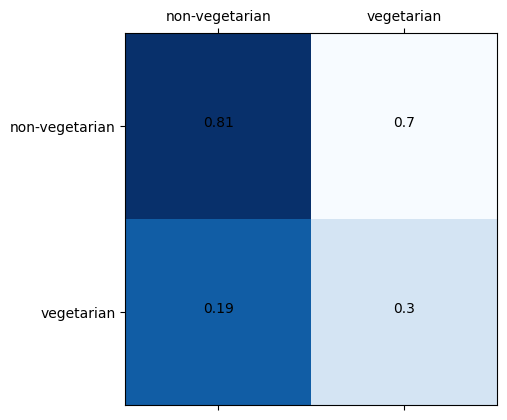

In [ ]:
Ac = np.mean(ysp[Y_test.astype(int)==0]==0)
Ar = np.mean(ysp[Y_test.astype(int)==1]==1)

Mc = np.mean(ysp[Y_test.astype(int)==0]==1)
Mr = np.mean(ysp[Y_test.astype(int)==1]==0)

CM = np.array([[Ac, Mc],[Mr, Ar]])

showConfMat(CM)

Based on the confusion matrix, we could see that the model correctly predicted 81% of ‘non-vegetarian’ images and the model correctly predicted 30% of ‘vegetarian’ images.

In [ ]:
model = RandomForestClassifier(n_estimators=5,max_depth=3,class_weight='balanced')
model.fit(X_train_fn, Y_train)

RandomForestClassifier(class_weight='balanced', max_depth=3, n_estimators=5)

In [ ]:
ytp = model.predict(X_train_fn)
ysp = model.predict(X_test_fn)

train_accuracy = np.mean(ytp==Y_train)
test_accuracy  = np.mean(ysp==Y_test)

print('Training Accuracy:\t',train_accuracy)
print('Test  Accuracy:\t',test_accuracy)

Training Accuracy:	 0.6211753278290433
Test  Accuracy:	 0.5698070374574348


The training accuracy is at 62% and the test accuracy is at 57%.

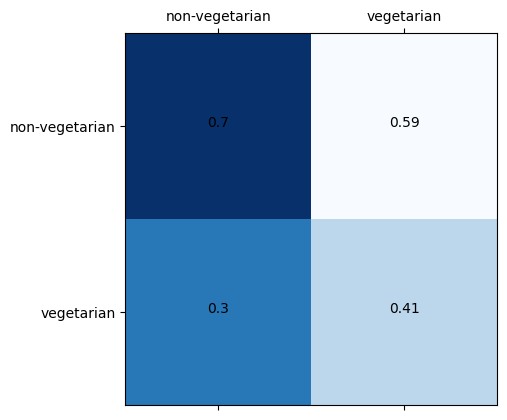

In [ ]:
Ac = np.mean(ysp[Y_test.astype(int)==0]==0)
Ar = np.mean(ysp[Y_test.astype(int)==1]==1)

Mc = np.mean(ysp[Y_test.astype(int)==0]==1)
Mr = np.mean(ysp[Y_test.astype(int)==1]==0)

CM = np.array([[Ac, Mc],[Mr, Ar]])

showConfMat(CM)

Based on the confusion matrix, we could see that the model correctly predicted 70% of ‘non-vegetarian’ images and the model correctly predicted 41% of ‘vegetarian’ images.

In [ ]:
from sklearn import svm

model = svm.SVC(kernel='rbf', class_weight='balanced')

model.fit(X_train_fn, Y_train)

ytp = model.predict(X_train_fn)
ysp = model.predict(X_test_fn)

In [ ]:
ytp = model.predict(X_train_fn)
ysp = model.predict(X_test_fn)

train_accuracy = np.mean(ytp==Y_train)
test_accuracy  = np.mean(ysp==Y_test)

print('Training Accuracy:\t',train_accuracy)
print('Test  Accuracy:\t',test_accuracy)

Training Accuracy:	 0.6168042739193783
Test  Accuracy:	 0.5936435868331441


The training accuracy is around 62% and the test accuracy is around 59%.

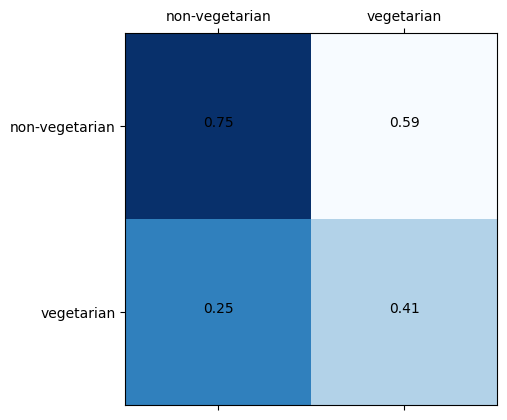

In [ ]:
Ac = np.mean(ysp[Y_test.astype(int)==0]==0)
Ar = np.mean(ysp[Y_test.astype(int)==1]==1)

Mc = np.mean(ysp[Y_test.astype(int)==0]==1)
Mr = np.mean(ysp[Y_test.astype(int)==1]==0)

CM = np.array([[Ac, Mc],[Mr, Ar]])

showConfMat(CM)

Based on the confusion matrix, we could see that the model correctly predicted 75% of ‘non-vegetarian’ images and the model correctly predicted 41% of ‘vegetarian’ images.

# Condition 3: Colour component and texture feature as inputs

In [ ]:
from skimage.feature import ORB
from skimage.feature import graycomatrix, graycoprops


def get_green_component(I, t1=35, t2=85):

  Ihsv = (rgb2hsv(I)*255).astype('uint8')
  mask = (Ihsv[:,:,0] > t1) & (Ihsv[:,:,0] < t2)
  green_pixels = mask.sum()
  return green_pixels

def get_red_component(I, t1=0, t2=30):

  Ihsv = (rgb2hsv(I)*255).astype('uint8')
  mask = (Ihsv[:,:,0] > t1) & (Ihsv[:,:,0] < t2)
  red_pixels = mask.sum()
  return red_pixels

def get_texture_features(I):

  Ig = (rgb2gray(I)*255).astype('uint8')
  glcm = graycomatrix(Ig, distances=[5], angles=[0], levels=256, symmetric=True, normed=True)


  contrast = graycoprops(glcm, 'contrast')[0, 0]
  dissimilarity = graycoprops(glcm, 'dissimilarity')[0, 0]
  energy = graycoprops(glcm, 'energy')[0, 0]
  correlation = graycoprops(glcm, 'correlation')[0, 0]

  return contrast,dissimilarity,energy,correlation


def showConfMat(CM, labels = ['non-vegetarian','vegetarian']):
  plt.matshow(CM,cmap='Blues')
  for i in range(CM.shape[0]):
    for j in range(CM.shape[1]):
      plt.text(i,j,CM[i,j].round(2),ha='center',)
  plt.xticks([0,1],labels)
  plt.yticks([0,1],labels)
  plt.show()

In [ ]:
X_train_f = []
for k, I in enumerate(X_train):
  f1 = get_green_component(I)
  f2 = get_red_component(I)
  f3,f4,f5,f6 = get_texture_features(I)
  X_train_f.append([f1,f2,f3,f4,f5,f6])

X_test_f = []
for k, I in enumerate(X_test):
  f1 = get_green_component(I)
  f2 = get_red_component(I)
  f3,f4,f5,f6 = get_texture_features(I)
  X_test_f.append([f1,f2,f3,f4,f5,f6])

In [ ]:
X_train_f = np.array(X_train_f)
X_test_f = np.array(X_test_f)
X_train_f.shape, X_test_f.shape

((2059, 6), (881, 6))

In [ ]:
MEAN = X_train_f.mean(0)
SD = X_train_f.std(0)

X_train_fn = (X_train_f - MEAN)/SD
X_test_fn = (X_test_f - MEAN)/SD

# 8 Results

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

model = LinearSVC(C=3)
model.fit(X_train_fn, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.


LinearSVC(C=3)

In [ ]:
ytp = model.predict(X_train_fn)
ysp = model.predict(X_test_fn)

train_accuracy = np.mean(ytp==Y_train)
test_accuracy  = np.mean(ysp==Y_test)

print('Training Accuracy:\t',train_accuracy)
print('Test  Accuracy:\t',test_accuracy)

Training Accuracy:	 0.5998057309373482
Test  Accuracy:	 0.5698070374574348


The training accuracy is around 60% and the test accuracy is around 57%.

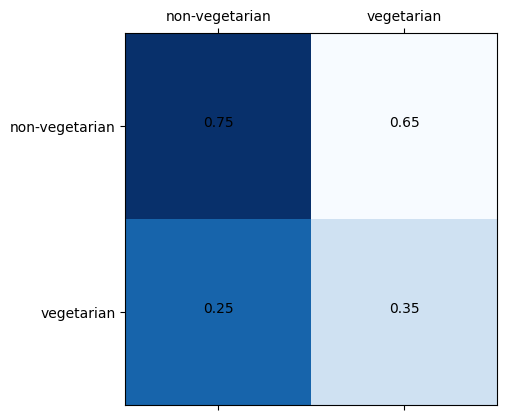

In [ ]:
Ac = np.mean(ysp[Y_test.astype(int)==0]==0)
Ar = np.mean(ysp[Y_test.astype(int)==1]==1)

Mc = np.mean(ysp[Y_test.astype(int)==0]==1)
Mr = np.mean(ysp[Y_test.astype(int)==1]==0)

CM = np.array([[Ac, Mc],[Mr, Ar]])

showConfMat(CM)

Based on the confusion matrix, we could see that the model correctly predicted 75% of ‘non-vegetarian’ images and the model correctly predicted 35% of ‘vegetarian’ images.

In [ ]:
model = RandomForestClassifier(n_estimators=8,max_depth=4,class_weight='balanced')
model.fit(X_train_fn, Y_train)

RandomForestClassifier(class_weight='balanced', max_depth=4, n_estimators=8)

In [ ]:
ytp = model.predict(X_train_fn)
ysp = model.predict(X_test_fn)

train_accuracy = np.mean(ytp==Y_train)
test_accuracy  = np.mean(ysp==Y_test)

print('Training Accuracy:\t',train_accuracy)
print('Test  Accuracy:\t',test_accuracy)

Training Accuracy:	 0.6352598348712968
Test  Accuracy:	 0.5800227014755959


The training accuracy is 64% and the test accuracy is 58%.

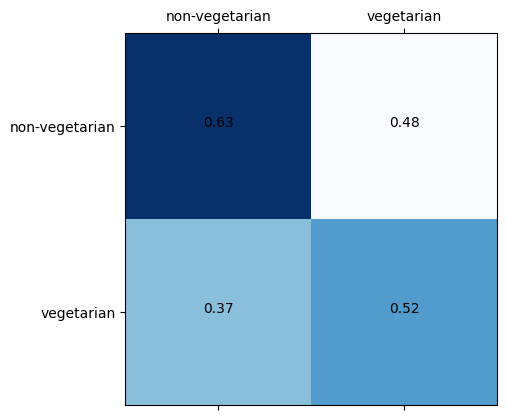

In [ ]:
Ac = np.mean(ysp[Y_test.astype(int)==0]==0)
Ar = np.mean(ysp[Y_test.astype(int)==1]==1)

Mc = np.mean(ysp[Y_test.astype(int)==0]==1)
Mr = np.mean(ysp[Y_test.astype(int)==1]==0)

CM = np.array([[Ac, Mc],[Mr, Ar]])

showConfMat(CM)

Based on the confusion matrix, we could see that the model correctly predicted 63% of ‘non-vegetarian’ images and the model correctly predicted 52% of ‘vegetarian’ images.

In [ ]:
from sklearn import svm

model = svm.SVC(kernel='rbf', class_weight='balanced')

model.fit(X_train_fn, Y_train)

ytp = model.predict(X_train_fn)
ysp = model.predict(X_test_fn)

In [ ]:
train_accuracy = np.mean(ytp==Y_train)
test_accuracy  = np.mean(ysp==Y_test)

print('Training Accuracy:\t',train_accuracy)
print('Test  Accuracy:\t',test_accuracy)

Training Accuracy:	 0.6342884895580378
Test  Accuracy:	 0.5856980703745743


The training accuracy is 63% and the test accuracy is around 59%.

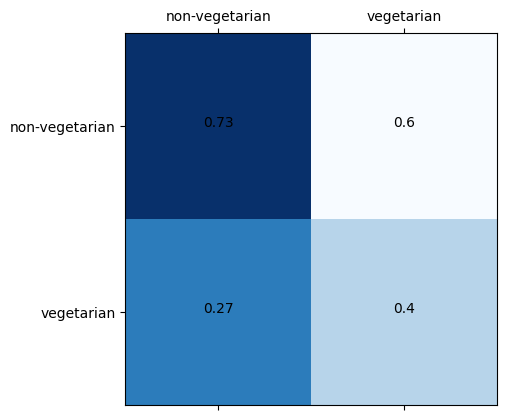

In [ ]:
Ac = np.mean(ysp[Y_test.astype(int)==0]==0)
Ar = np.mean(ysp[Y_test.astype(int)==1]==1)

Mc = np.mean(ysp[Y_test.astype(int)==0]==1)
Mr = np.mean(ysp[Y_test.astype(int)==1]==0)

CM = np.array([[Ac, Mc],[Mr, Ar]])

showConfMat(CM)

Based on the confusion matrix, we could see that the model correctly predicted 73% of ‘non-vegetarian’ images and the model correctly predicted 40% of ‘vegetarian’ images.

# Small conclusion of results

Now I will make a summary of the 3 experiments. In first experiement with only colour feature, LinearSVC has the highest test accuracy. In second experiment with only texture feature, svm.SVC model has the highest test accuracy. In the third experiment with colour feature and texture feature, svm.SVC model has the highest accuracy. Meanwhile, all three models in experiment 2 has higher test accuracy than experiment 1 while there are not much difference in experiment 2 and experiment 3. It shows that texture feature is more significant than colour feature. Therefore, in terms of test accuracy, svm.SVC model is considered the best model among three models neglecting experiment 1 with only colour feature.

To compare the model's performance on classification for 'vegetarian' and 'non-vegetarian', we need to see the confusion matrix. Based on the results, we could see that LinearSVC did the best to predict 'non-vegetarian' in all three experiments. For 'vegetarian', we could see that Random Forest Classifier and svm.SVC both did equally at predicting 'vegetarian' in experiment 1 and experiment 2 for 46% and 41% respectively. While Random Forest Classifier did the best at predicting 'vegetarian' in experiment 3 for 52%.

In terms of experiments, we could see that for experiment 2 with only texture feature, all 3 models perform the best at predicting 'non-vegetarian' but it is also the worst at predicting 'vegetarian'. Therefore, we can conclude that texture is more significant than colour when we want to make good classification for 'non-vegetarian' (meat). However, there is still room of improvements since the models could not correctly identify 'vegetarian' at a high percentage as same as 'non-vegetarian'.

# 9 Conclusion

Based on 3 experiments, we could see that the significance of texture feature is greater than that of colour components. However in experiment 2 with only texture feature, the models could not predict 'vegetarian' at a high rate. Actually, in all 3 experiments, the models could not predict 'vegetarian' at a high rate. Therefore, there is not enough significant features to capture the characteristics of 'vegetarian' and more work is needed.

If people would like to choose the model to better classify 'non-vegetarian', I would suggest choosing LinearSVC in experiment 2 since it has the highest percentage of 81%. If people would like to choose the model to better classify 'vegetarian', I would recommend them to choose Random Forest Classifier in experiment 3 with colour feature and texture features since it has the relatively highest percentage of 52%. But to be honest, since 52% is not a high percentage compared with that of 'non-vegetarian', I would recommend him to try to include more useful features and tried more machine learning models for better performance at classification of 'vegetarian'. The low percentage of 'vegetarian' maybe due to the following reasons:
- Colour similarity: Meat has large amount of red colour components. However, some vegetables like tomatoes or red peppers also have large amount of red colour components. This may confuse the model.
- Texture similarity: The texture of some vegetarian ingredients might be similar to meat. For example, mushrooms, tofu can have a texture similar to meat when cooked.



One suggestion for improvement is to add more relevant features as inputs. For example, location feature may help the model's performance getting better since in many dishes, the meat is usually in the center with vegetables around them. By doing this project, we could understand that different features can have different effect on model's performance.